In [2]:
import numpy as np, sympy as smp, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The Rocket Equation (1-D):

Start with $$\frac{d\vec p}{dt}=\sum_i \vec F_i$$
Let 
- $\mu$ be the coefficient of friction
- $v(t)$ be the rocket's speed as a function of time
- $v_g$ be the speed at which the rocket expels fuel
- $m(t)$ be the mass of the rocket as a function of time

We know that ${dp}_i=mdv+vdm$ and ${dp}_f=-dm(v-v_g)$ and hence $$dp=mdv+vdm-dm(v-v_g)=mdv+v_xdm$$ $$\frac{dp}{dt}=m\frac{dv}{dt}+v_g\frac{dm}{dt}$$
Friction and gravity: $\sum F=-gm(t)-bv^2$ assuming upward motion.
We get $$\frac{dv}{dt}=-g-\frac{b}{m(t)}v^2-\frac{v_g}{m(t)}\frac{dm(t)}{dt}$$
Dividing by $v_x$ and multiplying by some charachteristic time $T_0$:$$\frac{dv'}{dt'}=-\frac{gT_0}{v_g}-\frac{bv_gT_0}{m(t)}v'^2-\frac{1}{m(t)}\frac{dm(t)}{dt'}$$
where $v'=v/v_g$ and $t'=t/T_0$. Now let $m(t)=m_0z(t)$ where $m_0$ is the rocket's initial mass. Therefore: $$\frac{dv'}{dt'}=-\frac{gT_0}{v_g}-\frac{1}{m_0'z(t')}v'^2-\frac{1}{z(t')}\frac{dz(t')}{dt'}$$

In [3]:
T0 = 40
g = 9.807
vg = 500
M0 = 2e+04
mu = 0.1

m0 = M0 / (mu * vg * T0)

In [4]:
t, n = smp.symbols('t n')

z = 1 - (9 / 10) * t ** n
dz_dt = smp.diff(z, t)

z = smp.lambdify([t, n], z)
dz_dt = smp.lambdify([t, n], dz_dt)

In [5]:
t = np.linspace(1e-04, 1, 1000)

z1 = z(t, 1)
z2 = z(t, 0.7)
z3 = z(t, 5)

Text(0, 0.5, '$m(t)/m_0$')

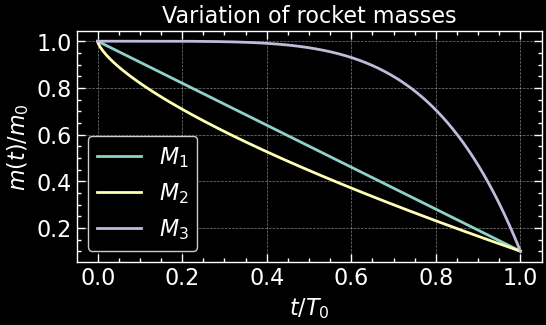

In [7]:
plt.figure(figsize = (6, 3))

plt.plot(t, z1, label = r'$M_1$')
plt.plot(t, z2, label = r'$M_2$')
plt.plot(t, z3, label = r'$M_3$')

plt.title('Variation of rocket masses')
plt.legend()
plt.xlabel(r'$t/T_0$')
plt.ylabel(r'$m(t)/m_0$')

In [8]:
def dSdt(t, S, m0, vg, n, T0 = 40):
    x, v = S[0], S[1]
    if t < 1:
        dx_dt = v
        dv_dt = -g * T0 / vg - 1 / (m0 * z(t, n)) * v ** 2 * np.sign(v) - 1 / z(t, n) * dz_dt(t, n)

    else:
        dx_dt = v
        dv_dt = -g * T0 / vg - 1 / (m0 * z(t, n)) * v ** 2 * np.sign(v)

    if (dv_dt < 0) * (dx_dt < 0) * (x <= 0):
        dx_dt = 0
        dv_dt = 0
    
    return [dx_dt, dv_dt]

In [9]:
n1, n2, n3 = 1, 0.7, 5.05

sol1 = solve_ivp(dSdt, [1e-04, 3], y0 = [0, 0], t_eval = np.linspace(1e-04, 3, 1000), args = (m0, vg, n1, T0))
sol2 = solve_ivp(dSdt, [1e-04, 3], y0 = [0, 0], t_eval = np.linspace(1e-04, 3, 1000), args = (m0, vg, n2, T0))
sol3 = solve_ivp(dSdt, [1e-04, 3], y0 = [0, 0], t_eval = np.linspace(1e-04, 3, 1000), args = (m0, vg, n3, T0))

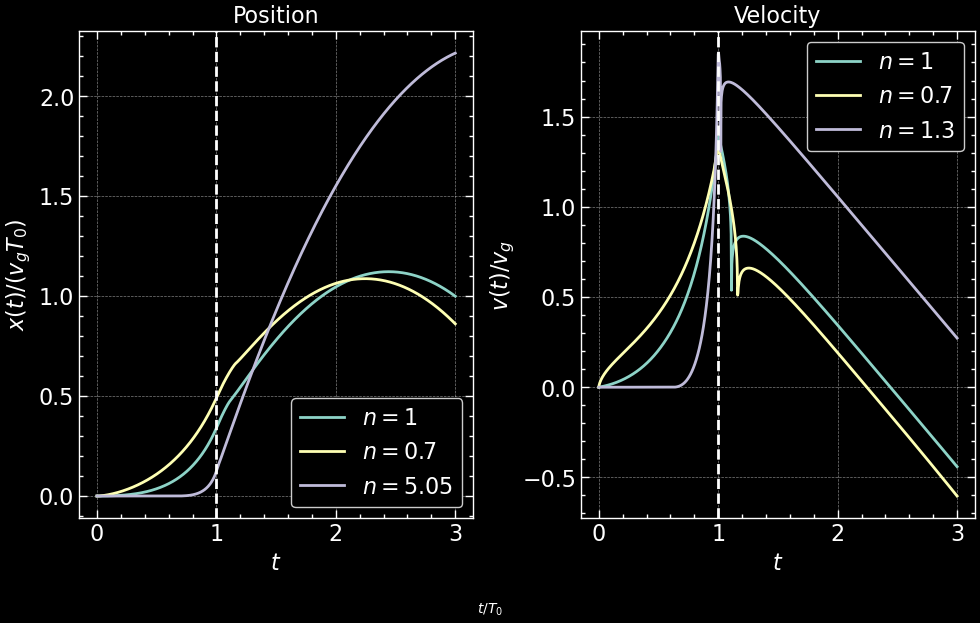

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (10,6))

ax = axes[0]

ax.plot(sol1.t, sol1.y[0], label = r'$n={}$'.format(n1))
ax.plot(sol2.t, sol2.y[0], label = r'$n={}$'.format(n2))
ax.plot(sol3.t, sol3.y[0], label = r'$n={}$'.format(n3))
ax.axvline(1, ls = '--', color = 'w')

ax.set_xlabel(r'$t$')
ax.set_ylabel('$x(t)/(v_g T_0)$')
ax.set_title('Position')
ax.legend()

ax = axes[1]

ax.plot(sol1.t, sol1.y[1], label = r'$n=1$')
ax.plot(sol2.t, sol2.y[1], label = r'$n=0.7$')
ax.plot(sol3.t, sol3.y[1], label = r'$n=1.3$')
ax.axvline(1, ls = '--', color = 'w')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$v(t)/v_g$')
ax.set_title('Velocity')
ax.legend()

fig.text(0.5, -0.04, r'$t/T_0$', ha = 'center')
fig.tight_layout()